In [43]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
X = pd.read_csv("train_FNC.csv")

In [45]:
X.head()

,Id,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,...,FNC369,FNC370,FNC371,FNC372,FNC373,FNC374,FNC375,FNC376,FNC377,FNC378
0,120873,0.34312,0.045761,-0.13112,0.15034,0.18082,0.289160,0.069545,-0.052489,0.124000,...,0.18743,0.163770,0.17686,0.074728,0.148600,0.343230,0.17565,0.52035,0.030613,0.30774
1,135376,0.28790,0.102570,-0.32343,-0.22776,0.12328,0.367020,-0.084040,0.038793,-0.006287,...,0.59834,-0.477880,0.26634,0.582940,-0.041272,0.630050,0.70314,0.36383,-0.207880,0.64138
2,139149,0.24585,0.216620,-0.12468,-0.35380,0.16150,-0.002032,-0.133020,-0.035222,0.259040,...,0.22866,-0.000816,0.25860,0.280450,-0.644640,0.332440,0.87074,-0.10973,-0.679160,0.32316
3,146791,0.42090,0.331380,0.24453,0.17167,0.59223,0.431050,0.280290,0.289620,0.356800,...,0.42881,0.711570,0.56593,0.248560,0.153860,0.093171,0.62556,0.60391,-0.058301,0.10779
4,153870,-0.14621,-0.468630,-0.52880,-0.50381,-0.51052,-0.029113,-0.015192,0.360170,0.005944,...,0.41688,-0.435600,0.32104,0.392960,-0.842430,0.425080,0.86509,-0.31281,-0.829640,0.24307


In [46]:
y = pd.read_csv("train_labels.csv")

In [47]:
y.head()

,Id,Class
0,120873,1
1,135376,0
2,139149,0
3,146791,0
4,153870,1


Merging Dataset

In [48]:
data = X.merge(y, on="Id").copy()

In [49]:
data.to_csv("final-data.csv")

In [50]:
data["Class"].value_counts()

0    46
1    40
Name: Class, dtype: int64

Data Split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = data.drop(["Id", "Class"], axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

Model Building

Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
forest = RandomForestClassifier(random_state=51, n_jobs=-1)

In [55]:
forest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=51)

In [56]:
forest_predictions = forest.predict(X_test)

Random Forest Performance

In [57]:
# libraries to check performance
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,  recall_score

In [84]:
forest_accuracy = accuracy_score(y_test, forest_predictions) * 100
forest_f1 = f1_score(y_test, forest_predictions) * 100
forest_recall = recall_score(y_test, forest_predictions) * 100

In [85]:
print(f"The accuracy is {accuracy_score(y_test, forest_predictions) * 100:.2f} %")
print(f"The f1 score is {f1_score(y_test, forest_predictions) * 100:.2f} %") 
print(f"The recall is {recall_score(y_test, forest_predictions) * 100:.2f} %")

The accuracy is 77.78 %
The f1 score is 75.00 %
The recall is 60.00 %


Confusion matrix

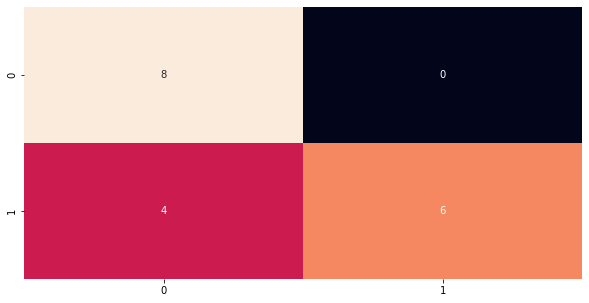

In [86]:
plt.figure(figsize=[10, 5])
sns.heatmap(confusion_matrix(y_test, forest_predictions), annot=True, cbar=False);
# TN   FP
# FN*   TP - Recall

Gradient Boosting 

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
gbm = GradientBoostingClassifier()

In [62]:
gbm.fit(X_train, y_train)

GradientBoostingClassifier()

In [63]:
gbm_predictions = gbm.predict(X_test)

Gradient Boosting Performance

In [87]:
gbm_accuracy = accuracy_score(y_test, gbm_predictions) * 100
gbm_f1 = f1_score(y_test, gbm_predictions) * 100
gbm_recall =recall_score(y_test, gbm_predictions) * 100

In [88]:
print(f"The accuracy is {accuracy_score(y_test, gbm_predictions) * 100:.2f} %")
print(f"The f1 score is {f1_score(y_test, gbm_predictions) * 100:.2f} %") 
print(f"The recall is {recall_score(y_test, gbm_predictions) * 100:.2f} %")

The accuracy is 50.00 %
The f1 score is 30.77 %
The recall is 20.00 %


Confusion matrix

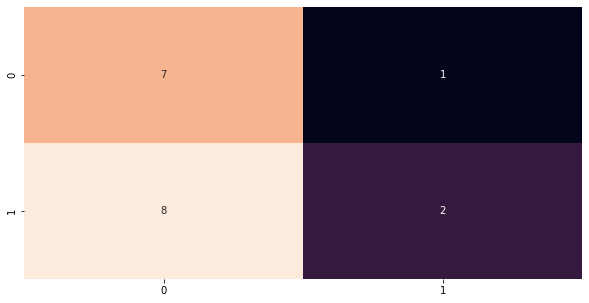

In [89]:
plt.figure(figsize=[10, 5])
sns.heatmap(confusion_matrix(y_test, gbm_predictions), annot=True, cbar=False);
# TN   FP
# FN*   TP - Recall

KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn = KNeighborsClassifier()

In [68]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [69]:
knn_predictions = knn.predict(X_test)

KNN Performance

In [90]:
knn_accuracy = accuracy_score(y_test, knn_predictions) * 100
knn_f1 = f1_score(y_test, knn_predictions) * 100
knn_recall = recall_score(y_test, knn_predictions) * 100

In [91]:
print(f"The accuracy is {accuracy_score(y_test, knn_predictions) * 100:.2f} %")
print(f"The f1 score is {f1_score(y_test, knn_predictions) * 100:.2f} %") 
print(f"The recall is {recall_score(y_test, knn_predictions) * 100:.2f} %")

The accuracy is 66.67 %
The f1 score is 66.67 %
The recall is 60.00 %


Confusion matrix

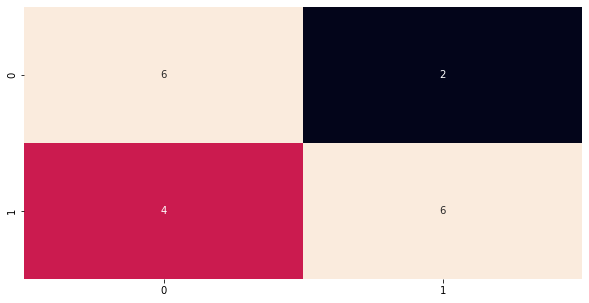

In [92]:
plt.figure(figsize=[10, 5])
sns.heatmap(confusion_matrix(y_test, knn_predictions), annot=True, cbar=False);
# TN   FP
# FN*   TP - Recall

XGBoost

In [72]:
from xgboost import XGBClassifier

In [73]:
booster = XGBClassifier()

In [74]:
booster.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [75]:
booster_predictions = booster.predict(X_test)

XGBoost Performance

In [93]:
booster_accuracy = accuracy_score(y_test, knn_predictions) * 100
booster_f1 = f1_score(y_test, knn_predictions) * 100
booster_recall = recall_score(y_test, knn_predictions) * 100

In [95]:
print(f"The accuracy is {accuracy_score(y_test, booster_predictions) * 100:.2f} %")
print(f"The f1 score is {f1_score(y_test, booster_predictions) * 100:.2f} %") 
print(f"The recall is {recall_score(y_test, booster_predictions) * 100:.2f} %")

The accuracy is 55.56 %
The f1 score is 50.00 %
The recall is 40.00 %


Confusion matrix

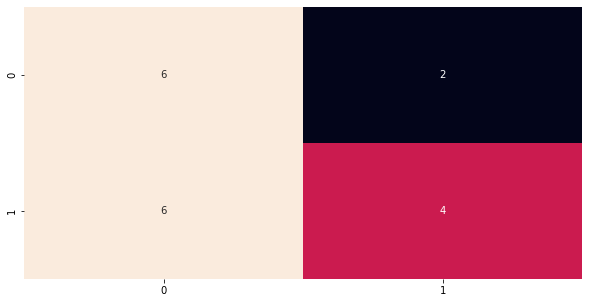

In [96]:
plt.figure(figsize=[10, 5])
sns.heatmap(confusion_matrix(y_test, booster_predictions), annot=True, cbar=False);
# TN   FP
# FN*   TP - Recall

SVM

In [78]:
from sklearn.svm import SVC

In [79]:
svm = SVC()

In [80]:
svm.fit(X_train, y_train)

SVC()

In [81]:
svm_predictions = svm.predict(X_test)

SVM Performance

In [97]:
svm_accuracy = accuracy_score(y_test, svm_predictions) * 100
svm_f1 = f1_score(y_test, svm_predictions) * 100
svm_recall = recall_score(y_test, svm_predictions) * 100

In [98]:
print(f"The accuracy is {accuracy_score(y_test, svm_predictions) * 100:.2f} %")
print(f"The f1 score is {f1_score(y_test, svm_predictions) * 100:.2f} %") 
print(f"The recall is {recall_score(y_test, svm_predictions) * 100:.2f} %")

The accuracy is 72.22 %
The f1 score is 70.59 %
The recall is 60.00 %


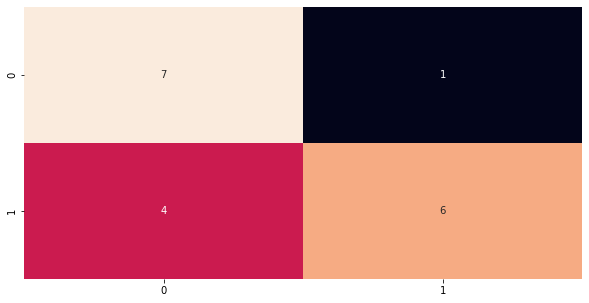

In [99]:
plt.figure(figsize=[10, 5])
sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, cbar=False);
# TN   FP
# FN*   TP - Recall

## Final Discussion

#### Accuracy

Lets create a dataframe that stores the accuracy of each model

In [100]:
#   Accuracy Table
accuracy_df = pd.DataFrame({
    "Model" : ["Random Forest", "Gradient Boosting",  "SVM", "KNN", "XGBoost"],
    "Accuracy" : [forest_accuracy, gbm_accuracy, svm_accuracy, knn_accuracy, booster_accuracy]
})

In [101]:
accuracy_df

,Model,Accuracy
0,Random Forest,77.777778
1,Gradient Boosting,50.000000
2,SVM,72.222222
3,KNN,66.666667
4,XGBoost,66.666667


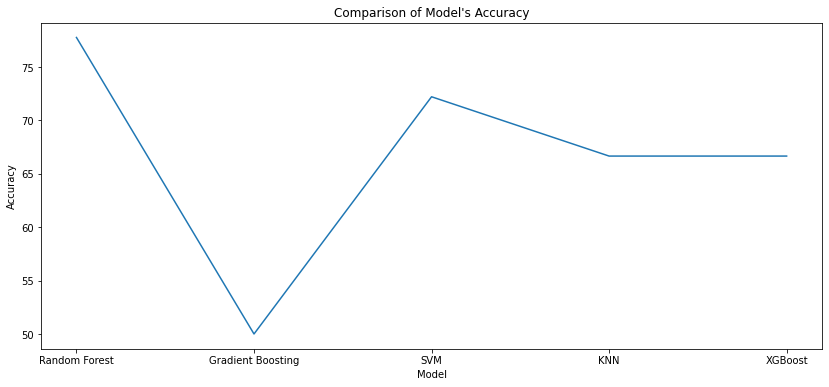

In [102]:
plt.figure(figsize=[14, 6])
plt.title("Comparison of Model's Accuracy")
sns.lineplot(data=accuracy_df, y="Accuracy", x="Model");

Random Forest had the best accuracy of 97% followed by Naives Bayes with an accuracy score of 94.2%, SVM had the lowest accuracy of 80.5%

### F1 Score

Lets create a dataframe that stores the F1 Score  of each model

In [103]:
#   f1 Table
f1_df = pd.DataFrame({
    "Model" : ["Random Forest", "Gradient Boosting",  "SVM", "KNN", "XGBoost"],
    "F1" : [forest_f1, gbm_f1, svm_f1, knn_f1, booster_f1]
})

In [104]:
f1_df

,Model,F1
0,Random Forest,75.000000
1,Gradient Boosting,30.769231
2,SVM,70.588235
3,KNN,66.666667
4,XGBoost,66.666667


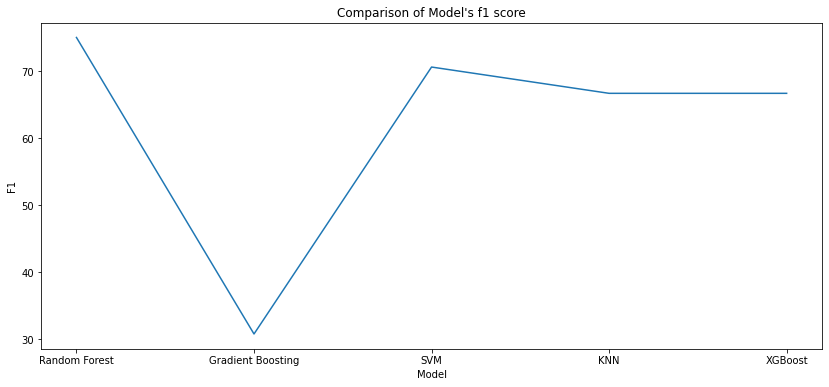

In [106]:
plt.figure(figsize=[14, 6])
plt.title("Comparison of Model's f1 score")
sns.lineplot(data=f1_df, y="F1", x="Model");

### Recall

Lets create a dataframe that stores the Recall Score  of each model

In [107]:
#   Recall Table
recall_df = pd.DataFrame({
    "Model" : ["Random Forest", "Gradient Boosting",  "SVM", "KNN", "XGBoost"],
    "Recall" : [forest_recall, gbm_recall, svm_recall, knn_recall, booster_recall]
})

In [108]:
recall_df

,Model,Recall
0,Random Forest,60.0
1,Gradient Boosting,20.0
2,SVM,60.0
3,KNN,60.0
4,XGBoost,60.0


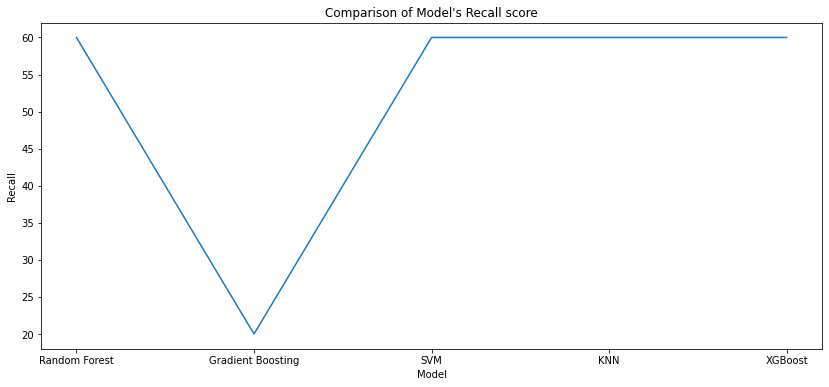

In [110]:
plt.figure(figsize=[14, 6])
plt.title("Comparison of Model's Recall score")
sns.lineplot(data=recall_df, y="Recall", x="Model");

Random Forest had the best f1 score of 94.8% followed by Naives Bayes with an f1 score of 90.4%, SVM had the lowest f1 of 53.7%

As expected, Random Forest Classifier performs the best among the three. Decision tree classifiers are excellent classifiers. Random forest is a popular ensemble model that uses a forest of decision trees. So, obviously, combibining the accuracy of 100 trees (as n_estimators=100 here), will create a powerful model.
This was a purely comparative study to check the workability of the dataset that I created, and to check how conventional models perform on the dataset